<a href="https://colab.research.google.com/github/vendiutomo/Predict-Daily-Stock-and-Customer-Clustering/blob/main/VIX_DS_Kalbe_Nutritionals_Vendi_Utomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[The 4 dataset tables have been merged using SQL before.](https://drive.google.com/file/d/12OTZ7wvJCxNuJ9QxCpGGogYncGnLvdlz/view?usp=sharing)

In [ ]:
# load tables
dataset = pd.read_csv('/content/drive/MyDrive/DS Projects/VIX - Rakamin/Kalbe Nutritionals - Data Scientist/Dataset/full_table_casestudy.csv', delimiter=';')
data = dataset.copy()

In [ ]:
data

,transactionid,customerid,datetrasaction,productid,price,qty,totalamount,storeid,storeid.1,storename,...,latitude,longitude,customerid.1,age,gender,maritalstatus,income,productid.1,productname,price.1
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,12,Prestasi Utama,...,"-2,990934","104,756554",328,36,0,Married,"10,53",P3,Crackers,7500
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,1,Prima Tendean,...,"-6,2","106,816666",165,44,1,Married,"14,58",P9,Yoghurt,10000
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,4,Gita Ginara,...,"-6,966667","110,416664",183,27,1,Single,"0,18",P1,Choco Bar,8800
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,4,Gita Ginara,...,"-6,966667","110,416664",160,48,1,Married,"12,57",P1,Choco Bar,8800
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,4,Gita Ginara,...,"-6,966667","110,416664",386,33,0,Married,"6,95",P9,Yoghurt,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,3,Prima Kota,...,"-7,797068","110,370529",243,38,0,Married,"3,34",P10,Cheese Stick,15000
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,9,Lingga,...,"-3,654703","128,190643",271,29,0,Married,"4,74",P2,Ginger Candy,3200
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,9,Lingga,...,"-3,654703","128,190643",52,37,0,Married,"3,73",P7,Coffee Candy,9400
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,13,Buana,...,"-1,26916","116,825264",18,47,0,Married,"13,6",P8,Oat,16000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   datetrasaction  5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   storeid.1       5020 non-null   int64 
 9   storename       5020 non-null   object
 10  groupstore      5020 non-null   object
 11  typestore       5020 non-null   object
 12  latitude        5020 non-null   object
 13  longitude       5020 non-null   object
 14  customerid.1    5020 non-null   int64 
 15  age             5020 non-null   int64 
 16  gender          5020 non-null   int64 
 17  maritalstatus   5020 non-null   object
 18  income  

In [ ]:
dataset.nunique()

transactionid     4908
customerid         447
datetrasaction     365
productid           10
price               10
qty                 10
totalamount         44
storeid             14
storeid.1           14
storename           12
groupstore           7
typestore            2
latitude            14
longitude           14
customerid.1       447
age                 54
gender               2
maritalstatus        2
income             369
productid.1         10
productname         10
price.1             10
dtype: int64

# Data Cleansing

In [ ]:
data.describe()

,customerid,price,qty,totalamount,storeid,storeid.1,customerid.1,age,gender,price.1
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,7.489841,221.263745,40.003586,0.452988,9684.800797
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,4.028502,129.672955,12.834719,0.497835,4600.708780
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3200.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,4.000000,108.000000,30.000000,0.000000,4200.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,7.000000,221.000000,39.000000,0.000000,9400.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,11.000000,332.000000,51.000000,1.000000,15000.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,14.000000,447.000000,72.000000,1.000000,18000.000000


## Data Duplicated

In [ ]:
# data duplicated check
print('Jumlah data duplikat :', data.duplicated().sum())

Jumlah data duplikat : 0


## Missing Values

In [ ]:
# check missing values
data.isnull().sum()

transactionid     0
customerid        0
datetrasaction    0
productid         0
price             0
qty               0
totalamount       0
storeid           0
storeid.1         0
storename         0
groupstore        0
typestore         0
latitude          0
longitude         0
customerid.1      0
age               0
gender            0
maritalstatus     0
income            0
productid.1       0
productname       0
price.1           0
dtype: int64

## Feature Selection

In [ ]:
# drop useless columns
data.drop(columns = [
   'storeid.1',
   'latitude',
   'longitude',
   'customerid.1',
   'productid.1',
   'price.1'
    ], inplace=True)

## Data Type Adjustment

In [ ]:
data['datetrasaction'].sample()

312    2022-01-22
Name: datetrasaction, dtype: object

In [ ]:
# adjust dtype column 'datetransaction' to datetime
data['datetrasaction'] = pd.to_datetime(data['datetrasaction'], format = '%Y-%m-%d')

# all transactions are purchased by customers in 2022
# labeling all data from day 1 to 365 in 2022
data['day'] = pd.to_numeric((data['datetrasaction'] - pd.to_datetime('2021-12-31')) / np.timedelta64(1, 'D'))
data.drop(columns = ['datetrasaction'], inplace=True)

In [ ]:
data

,transactionid,customerid,productid,price,qty,totalamount,storeid,storename,groupstore,typestore,age,gender,maritalstatus,income,productname,day
0,TR11369,328,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,36,0,Married,"10,53",Crackers,1.0
1,TR16356,165,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,44,1,Married,"14,58",Yoghurt,1.0
2,TR1984,183,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,27,1,Single,"0,18",Choco Bar,1.0
3,TR35256,160,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,48,1,Married,"12,57",Choco Bar,1.0
4,TR41231,386,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,33,0,Married,"6,95",Yoghurt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,P10,15000,5,75000,3,Prima Kota,Prima,Modern Trade,38,0,Married,"3,34",Cheese Stick,365.0
5016,TR5604,271,P2,3200,4,12800,9,Lingga,Lingga,Modern Trade,29,0,Married,"4,74",Ginger Candy,365.0
5017,TR81224,52,P7,9400,6,56400,9,Lingga,Lingga,Modern Trade,37,0,Married,"3,73",Coffee Candy,365.0
5018,TR85016,18,P8,16000,3,48000,13,Buana,Buana,General Trade,47,0,Married,"13,6",Oat,365.0


# Machine Learning Regression (Time Series)

Predict the number of sales (quantity) of the total product.

In [ ]:
data_ml_regr = data.copy()

## Preprocessing

In [ ]:
data_ml_regr.sample(3)

,transactionid,customerid,productid,price,qty,totalamount,storeid,storename,groupstore,typestore,age,gender,maritalstatus,income,productname,day
3911,TR74251,247,P2,3200,3,9600,3,Prima Kota,Prima,Modern Trade,33,1,Married,"8,11",Ginger Candy,282.0
2480,TR74178,92,P5,4200,4,16800,5,Bonafid,Gita,General Trade,60,0,Married,"10,72",Thai Tea,177.0
2231,TR33375,387,P4,12000,3,36000,1,Prima Tendean,Prima,Modern Trade,36,0,Married,"9,1",Potato Chip,161.0


In [ ]:
ml_regr = data_ml_regr.groupby(['day']).agg({'transactionid' : 'count', 'qty' : 'sum'}).reset_index()
ml_regr.columns = ['day', 'trx_count', 'total_qty']

In [ ]:
ml_regr

,day,trx_count,total_qty
0,1.0,13,49
1,2.0,16,59
2,3.0,18,63
3,4.0,18,45
4,5.0,10,30
...,...,...,...
360,361.0,18,70
361,362.0,17,68
362,363.0,15,42
363,364.0,12,44


<Figure size 1200x500 with 0 Axes>

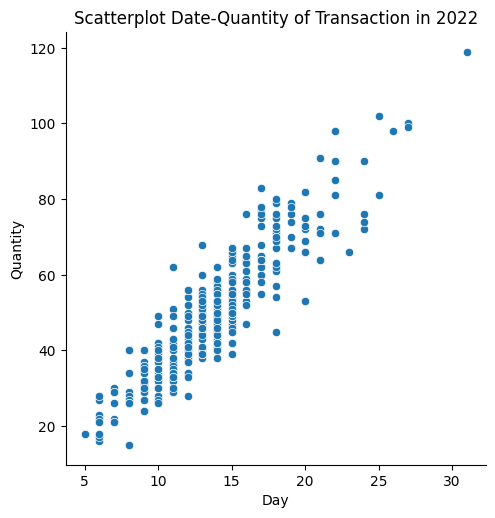

In [ ]:
# visualize data
plt.figure(figsize=(12,5))
sns.pairplot(ml_regr, x_vars=['trx_count'], y_vars=['total_qty'], height=5, kind='scatter')

plt.xlabel('Day')
plt.ylabel('Quantity')

plt.title('Scatterplot Date-Quantity of Transaction in 2022')
plt.show()

## Modelling

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# split train and test
X = ml_regr['trx_count']
y = ml_regr['total_qty']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)

In [ ]:
# adjusting the regression line with the distribution of the data (fit)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# the model makes predictions
y_pred = lr.predict(X_test)

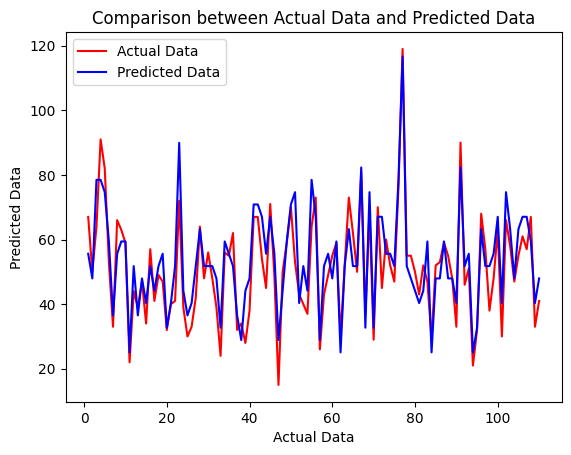

In [ ]:
# compare actual and predicted data
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='-', label='Predicted Data')

plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

plt.legend()

plt.title('Comparison between Actual Data and Predicted Data')

plt.show()

## Model Evaluation

In [ ]:
# import metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# r2 score
r2 = r2_score(y_test, y_pred)
print('r2 score :', r2)

r2 score : 0.7801872762442322


In [ ]:
# mean squared error
mse = mean_squared_error(y_test, y_pred)
print('mean squared error :', mse)

mean squared error : 58.095885233062006


In [ ]:
# intercept and coeff of the line
print('Intercept of the model : ', lr.intercept_)
print('Coefficient of the model : ', lr.coef_)

Intercept of the model :  -1.6236995752724042
Coefficient of the model :  [3.81464395]


> Model regresi linear: y = 3.815x - 1.624

## Conclution and recomendation

1. The linear equation can be used in the future to build a model that can predict daily stock requirements.

2. To predict with bigger number of products (or transactions), we can do modeling for each product. More detailed prediction will be more effective in preparing stocks of each product for daily needs.

# Machine Learning Clustering
Create customer clusters/segments based on several criteria (number of transaction, quantity, and total amount)

In [ ]:
data_ml_clus = data.copy()

## Preprocessing

In [ ]:
ml_clus = data_ml_clus.groupby(['customerid']).agg({'transactionid' : 'count',
                                                    'qty' : 'sum',
                                                    'totalamount' : 'sum'
                                                    }).reset_index()
ml_clus.columns = ['customer_id', 'trx_count', 'total_qty', 'total_spent']

In [ ]:
ml_clus.head()

,customer_id,trx_count,total_qty,total_spent
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


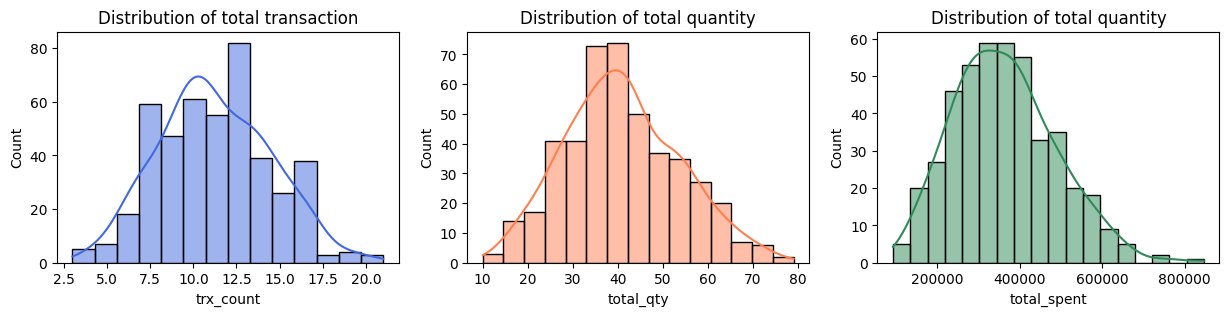

In [ ]:
# visualize the distribution of data
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.histplot(ml_clus['trx_count'], color='royalblue', kde=True)
plt.title('Distribution of total transaction')

plt.subplot(1,3,2)
sns.histplot(ml_clus['total_qty'], color='coral', kde=True)
plt.title('Distribution of total quantity')

plt.subplot(1,3,3)
sns.histplot(ml_clus['total_spent'], color='seagreen', kde=True)
plt.title('Distribution of total quantity')

plt.show()

## Modelling

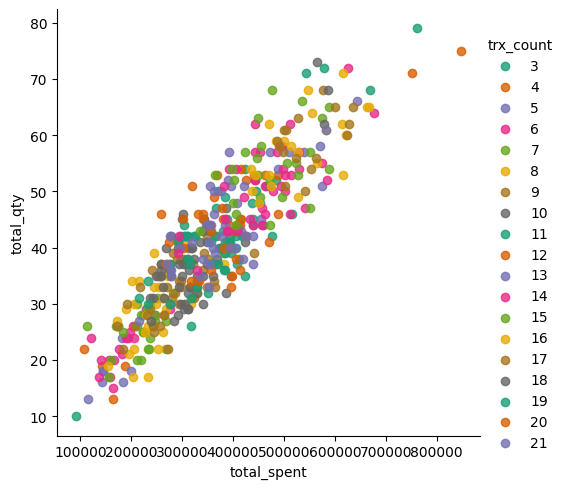

In [ ]:
# total_spent vs total_qty vs trx_count
sns.lmplot(x='total_spent', y='total_qty', data=ml_clus, fit_reg=False, hue='trx_count', height=5, palette='Dark2')

### Find the Optimal Number of Clusters

In [ ]:
# import library
from sklearn.cluster import KMeans

In [ ]:
# modeling
X = ml_clus

inertias = []
mapping = {}
K = range(1, 11)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_)

    mapping[k] = kmeanModel.inertia_

In [ ]:
# print values
for key, val in mapping.items():
	print(f'{key} : {val}')

1 : 6928039302450.738
2 : 2434670081071.841
3 : 1233423905337.279
4 : 776519298683.0629
5 : 504088666365.60034
6 : 382128457574.87415
7 : 277942126134.12036
8 : 212860695089.02994
9 : 171273228226.57758
10 : 137787539028.4454


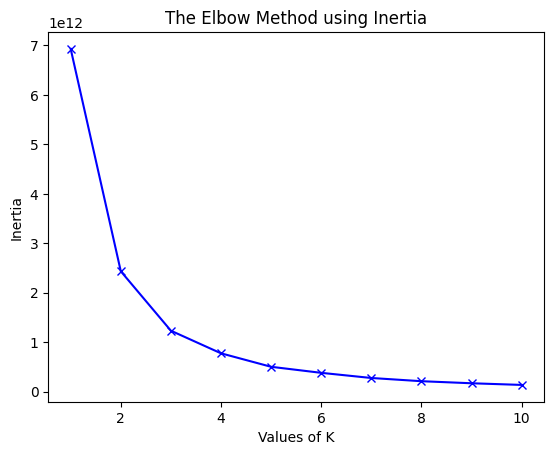

In [ ]:
# visualize values
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

> From clusters 1 to 3 the distance between clusters is quite far apart, but from clusters 3 to 4 onwards the distance is quite close and getting closer. It can be said that cluster 3 is an optimal cluster.

### 3 cluster modelling

In [ ]:
# modeling with 3 cluster
kmeans = KMeans (n_clusters = 3, init='k-means++',
                 n_init=10, max_iter=300,
                 tol=0.0001, random_state=100)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
ml_clus['cluster'] = kmeans.labels_

In [ ]:
# total customer each cluster
ml_clus['cluster'].value_counts().to_frame().reset_index().rename(columns={'index':'cluster','cluster':'total_customers'})

,cluster,total_customers
0,0,191
1,2,162
2,1,94


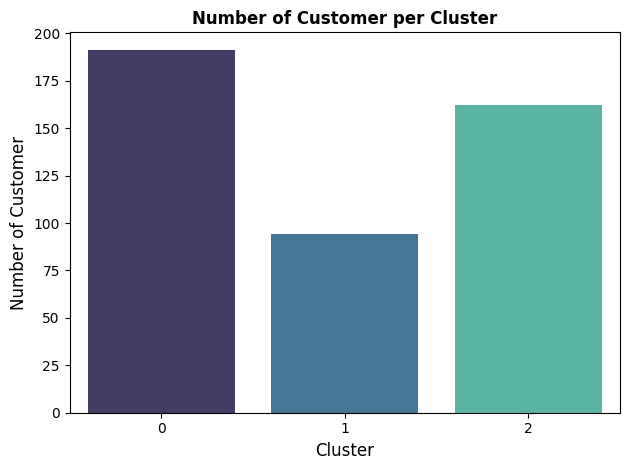

In [ ]:
# visualization
sns.countplot(x = ml_clus['cluster'], palette = 'mako')
plt.title('Number of Customer per Cluster', fontweight ='bold')
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.tight_layout()

## Cluster Interpretation

In [ ]:
ml_clus.head()

,customer_id,trx_count,total_qty,total_spent,cluster
0,1,17,60,623300,1
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,2
4,5,7,27,268600,2


### Cluster Analysis

In [ ]:
# group by customer
group_cluster = ml_clus.groupby(['cluster']).agg({'customer_id': ['count'],
                                                  'trx_count':['mean', 'median', 'min', 'max'],
                                                  'total_qty':['mean', 'median', 'min', 'max'],
                                                  'total_spent':['mean', 'median', 'min', 'max']}
                                                ).reset_index()

group_cluster.columns = [   'cluster','total_cust',
                            'mean_trx','median_trx','min_trx','max_trx',
                            'mean_qty','median_qty','min_qty','max_qty',
                            'mean_spent','median_spent','min_spent','max_spent'
                            ]

In [ ]:
group_cluster

,cluster,total_cust,mean_trx,median_trx,min_trx,max_trx,mean_qty,median_qty,min_qty,max_qty,mean_spent,median_spent,min_spent,max_spent
0,0,191,11.649215,11.0,7,16,42.340314,42.0,26,63,378894.764398,381400.0,308800,459100
1,1,94,15.212766,15.0,11,21,57.755319,57.0,41,79,544541.489362,527000.0,462700,846700
2,2,162,8.425926,8.0,3,14,29.506173,29.5,10,46,237575.308642,246350.0,92100,306400


### Visualization

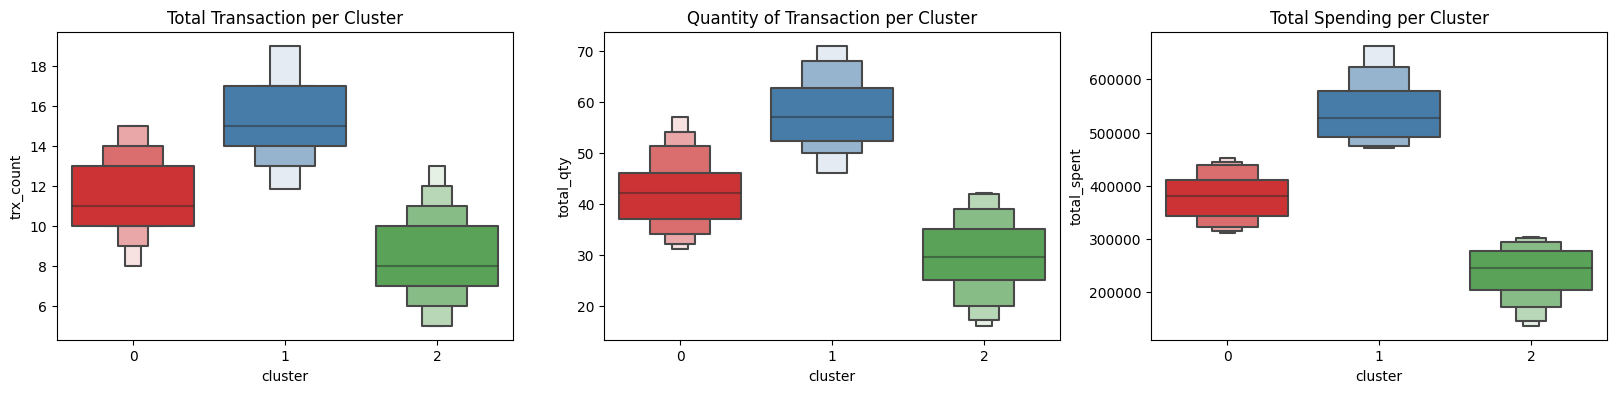

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.boxenplot(x=ml_clus['cluster'], y=ml_clus['trx_count'], palette='Set1',  showfliers=False)
plt.title('Total Transaction per Cluster')

plt.subplot(1,3,2)
sns.boxenplot(x=ml_clus['cluster'], y=ml_clus['total_qty'], palette='Set1',  showfliers=False)
plt.title('Quantity of Transaction per Cluster')

plt.subplot(1,3,3)
sns.boxenplot(x=ml_clus['cluster'], y=ml_clus['total_spent'], palette='Set1',  showfliers=False)
plt.title('Total Spending per Cluster')

plt.show()

### Interpretation

> **Cluster 0**
- transaction : 7 - 16
- quantity product : 26 - 63
- spending amount : IDR 308.800 - 459.100

Customers in this group make transactions in a fairly rare amount, although not as many as cluster 1 but not the smallest. This group defined as **Mid Spender**

> **Cluster 1**
- transaction : 6 - 15
- quantity product :41 - 79
- spending amount : IDR 462.700 - 846.700

This group has highest average transactions, highest average product purchase quantity and largest average total purchases compared to other groups. This group is defined as **High Spender**.

> **Cluster 2**
- transaction : 3 - 14
- quantity product : 10 - 46
- spending amount : IDR 92.100 - 306.400

This group has the smallest transactions, quantities and purchases compared to other groups. This group tends to make purchases in small quantities and with small frequency. This cluster is defined as **Low Spender**.


## Recomendation

1. Monitoring transactions and retention from the High Spender group, can improve service so that these groups do not churn in the future.

2. For the Mid Spender group, further analysis can be carried out on how to increase transactions by providing more personal recommendations, as well as deeper analysis on how to optimize promos in this segment and keep shopping.

3. For the Low Spender group, further analysis can also be carried out on how to increase the desire to make transactions. This can be caused by products or prices that do not match.

### Other Insights

In [ ]:
# group by customer
cust_data = data_ml_clus.groupby(['customerid']).agg({
    'transactionid' : 'count',
    'qty' : 'sum',
    'totalamount' : 'sum',
    'age' : 'min',
    'gender' : 'min',
    'maritalstatus' : 'min',
    'income' : 'min',
    'productname' : 'count'
}).reset_index()

# rename columns
cust_data.columns=['id', 'trx_count', 'qty', 'total_amount', 'age', 'gender', 'status', 'income', 'product_count']

# data type 'income' from string to numeric
new_income = cust_data["income"].str.split(",", n = 1, expand = True)
new_income.columns = ['satu','dua']
new_income = new_income['satu'] + '.' + new_income['dua']
new_income = pd.to_numeric(new_income)
cust_data['income'] = new_income

# cluster label
cust_data['cluster'] = kmeans.labels_

# feature encoding
map_cluster = {
    0 : 'Mid Spender',
    1 : 'High Spender',
    2 : 'Low Spender',
}

cust_data['cluster'] = cust_data['cluster'].map(map_cluster)

# separate each cluster
high = cust_data[(cust_data.cluster == 'High Spender')]
mid = cust_data[(cust_data.cluster == 'Mid Spender')]
low = cust_data[(cust_data.cluster == 'Low Spender')]

1. **Based on income.**

In [ ]:
cust_data.groupby(['cluster']).agg({'income': ['mean', 'median', 'min', 'max']}).reset_index()

cluster    income                    
                     mean median   min    max
0  High Spender  8.341000  7.890  1.12  20.81
1   Low Spender  9.278961  7.535  0.14  71.30
2   Mid Spender  8.972787  8.110  0.06  54.20

> The average and median of income in the High Spender group is the smallest compared to the other groups.

> This means that it is very possible for the Mid Spender and Low Spender groups to increase their transactions. Income is not the main reason why the number of transactions in this group is low.

2. **Based on marital status.**

In [ ]:
cust_data.groupby(['cluster', 'status']).agg({'id': ['count']}).reset_index()

,cluster,status,id
,,,count
0,High Spender,Married,66
1,High Spender,Single,28
2,Low Spender,Married,125
3,Low Spender,Single,37
4,Mid Spender,Married,149
5,Mid Spender,Single,42


> There is no effect of marital status on the desire to buy the product.

3. **Based on gender.**

In [ ]:
cust_data.groupby(['cluster', 'gender']).agg({'id': ['count']}).reset_index()

,cluster,gender,id
,,,count
0,High Spender,0,52
1,High Spender,1,42
2,Low Spender,0,81
3,Low Spender,1,81
4,Mid Spender,0,109
5,Mid Spender,1,82


> There is no significant amount, gender does not affect the desire to buy our product.

4. **Based on age.**

In [ ]:
cust_data.groupby(['cluster']).agg({'age': ['mean', 'median', 'min', 'max']}).reset_index()

cluster        age               
                      mean median min max
0  High Spender  39.382979   38.5   2  61
1   Low Spender  39.185185   39.0   0  72
2   Mid Spender  40.486911   39.0  18  69

> Values in each cluster tend to be the same, age does not affect the desire to buy.